In [30]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('BestData.csv')
data.head()

,Dt,Res_FC,Com_FC,GMP,RDInc,HH,Emp,Emp_Manuf,Empl_NonM,DMCHI_GMP,...,Total Permits,Tot Housing Starts,HDD,Res Cust,SCI Cust,LCI Cust,Tot Housing Completions,Labor Force,CPI,Resident Emplt
0,1/1/2004,"3,577","1,558",514,"342,672","3,218","4,255",492,"3,762",452,...,"2,404","43,620",1379,NaN,NaN,NaN,"43,826","4,477",185,"4,184"
1,2/1/2004,"4,429","2,150",515,"343,963","3,220","4,259",492,"3,767",453,...,"2,441","42,587",1086,NaN,NaN,NaN,"44,348","4,479",186,"4,188"
2,3/1/2004,"3,667","1,253",516,"345,255","3,222","4,263",492,"3,772",453,...,"4,383","41,553",730,NaN,NaN,NaN,"44,869","4,480",187,"4,191"
3,4/1/2004,"4,612","1,348",517,"347,201","3,223","4,268",491,"3,777",454,...,"3,809","37,620",445,NaN,NaN,NaN,"45,382","4,479",188,"4,193"
4,5/1/2004,"5,026","1,143",518,"347,838","3,225","4,272",491,"3,781",455,...,"4,130","39,485",200,NaN,NaN,NaN,"45,913","4,482",188,"4,198"


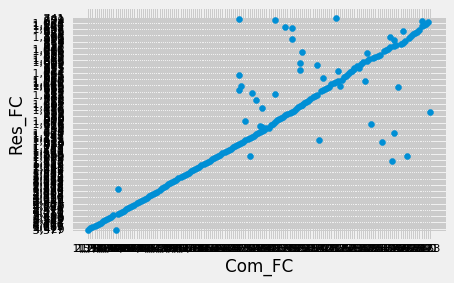

In [32]:
X = data[0:196]
#Visualise data points
plt.scatter(X["Com_FC"],X["Res_FC"])
plt.xlabel('Com_FC')
plt.ylabel('Res_FC')
plt.show()

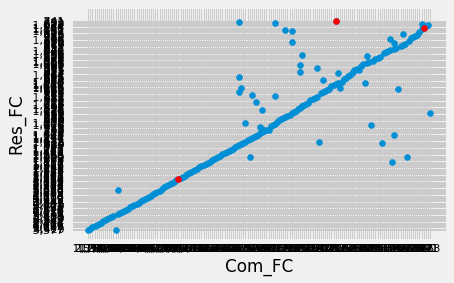

In [33]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Com_FC"],X["Res_FC"])
plt.scatter(Centroids["Com_FC"],Centroids["Res_FC"],c='red')
plt.xlabel('Com_FC')
plt.ylabel('Res_FC')
plt.show()

### 1. PCA on dataset
### 2. Normalise to get gaussian data
### 3. 11-D matrix
### 4. K- means

In [36]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(int(row_c["Com_FC"])-int(row_d["Com_FC"]))**2
            d2=(row_c["Res_FC"]-row_d["Res_FC"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Com_FC","Res_FC"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Com_FC'] - Centroids['Com_FC']).sum() + (Centroids_new['Res_FC'] - Centroids['Res_FC']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Com_FC","Res_FC"]]

ValueError: invalid literal for int() with base 10: ' 1,558 '